In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dplm_base

%matplotlib inline

In [6]:
del dplm_instance

In [4]:
dplm_instance = dplm_base.dplm('para1.csv')
dplm_instance.show_dplm_config()
dplm_instance.set_dplm_slot_num(10)
dplm_instance.set_dplm_spring_num(3)
# dplm_instance.set_springs_positions([0.16,0.16,0.16])
dplm_instance.set_dplm_spring_constants([4.00651466e-02,3.99968180e-01,4.03535235e-02])
dplm_instance.set_dplm_spring_lengths([1.00001904e-01,1.00019105e-01,1.00199074e-01])
dplm_instance.set_springs_positions([3.99868244e+02, 3.30538434e+02,
 3.99935009e+02])
dplm_instance.set_dplm_allowed_angle_range(-20, 60, 1)
# dplm_instance.set_slot([-6, 18, 0])
# moment_weight, moment_spring_list, moment_total = dplm_instance.calculate_current_moment()

# 26 32 38
#13 37 38

Column names are linkage, length, mass
alpha_o1o_1:0
alpha_o2o4:0
alpha_o2o_2:0
alpha_o3o_3:0
alpha_o4o_4:0
alpha_o_1o_2:0
l_o1o2:0.254
l_o1o3:0.10699999999999998
l_o1o_1:0.762
l_o2o4:0.615
l_o2o_2:0.762
l_o3o4:0.254
l_o3o_3:0.648
l_o4o_4:0.648
l_o_1o_2:0.254
l_o_3o_4:0.254
m_o1o2:0.29870661
m_o1o_1:0.84734661
m_o2o4:0.67904403
m_o2o_2:0.84734661
m_o3o_3:0.72422661
m_o4o_4:0.72422661
m_o_1o_2:0.29870661
r_o1o_1:0.381
r_o2o4:0.3075
r_o2o_2:0.381
r_o3o_3:0.324
r_o4o_4:0.324
r_o_1o_2:0.127
The number of slots is set to 10


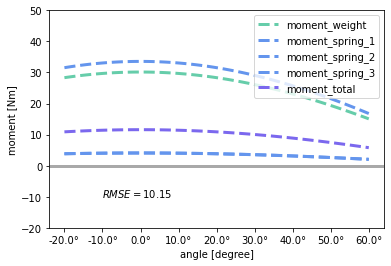

10.152139436342134


In [7]:
lower_limit, upper_limit, step_size, total_angle_num = dplm_instance.get_allowed_angle_range().values()

a,b,c, rmse = dplm_instance.calculate_current_moment()
%matplotlib inline
plt.cla()    
plt.plot(range(lower_limit, upper_limit+1), a, label = 'moment_weight', ls = '--', lw = 3, color = 'mediumaquamarine')

ax = plt.gca()

for i in range(len(b)):
    plt.plot(range(lower_limit,upper_limit+1), b[i], label = 'moment_spring_{}'.format(i+1), ls = '--', lw = 3, color = 'cornflowerblue')

plt.plot(range(lower_limit, upper_limit+1), c, label = 'moment_total', ls = '--', lw = 3, color = 'mediumslateblue')
plt.axhline(y = 0, ls = '-', lw = 3, color = 'darkgrey')

plt.axis(ymin=-20, ymax=50)
plt.legend()
plt.xlabel('angle [degree]')
plt.ylabel('moment [Nm]')
ax.xaxis.set_major_formatter('{x}°')


plt.text(-10,-10, r'$RMSE={:.2f}$'.format(rmse))


plt.show()

print(rmse)

In [ ]:
import gym
import math
import os
import time
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env

# %matplotlib widget

cwd = os.getcwd()
angle_range = {
    'lower_limit' : -20,
    'upper_limit' : 60,
    'step_size' : 1
}

env = gym.make('gym_dplm:dplm-v0', 
                dplm_config_file = cwd+"/para1.csv",
                spring_num = 3,
                slot_num = 20,
                spring_constants = [300,300,300],
                spring_init_lengths = [0.16,0.16,0.16],
                **angle_range)

check_env(env)

## A callback for displaying a progress bar while training

In [3]:
from tqdm.auto import tqdm
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy

class ProgressBarCallback(BaseCallback):
    """
    :param pbar: (tqdm.pbar) Progress bar object
    """
    def __init__(self, pbar):
        super(ProgressBarCallback, self).__init__()
        self._pbar = pbar

    def _on_step(self):
        # Update the progress bar:
        self._pbar.n = self.num_timesteps
        self._pbar.update(0)

# this callback uses the 'with' block, allowing for correct initialisation and destruction
class ProgressBarManager(object):
    def __init__(self, total_timesteps): # init object with total timesteps
        self.pbar = None
        self.total_timesteps = total_timesteps
        
    def __enter__(self): # create the progress bar and callback, return the callback
        self.pbar = tqdm(total=self.total_timesteps)
            
        return ProgressBarCallback(self.pbar)

    def __exit__(self, exc_type, exc_val, exc_tb): # close the callback
        self.pbar.n = self.total_timesteps
        self.pbar.update(0)
        self.pbar.close()
        

In [ ]:
import gym
import math
import os
import time

from stable_baselines3 import DQN, A2C, PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.cmd_util import make_vec_env

cwd = os.getcwd()
angle_range = {
    'lower_limit' : -20,
    'upper_limit' : 60,
    'step_size' : 1
}

env = gym.make('gym_dplm:dplm-v0', 
                dplm_config_file = cwd+"/para1.csv",
                spring_num = 3,
                slot_num = 20,
                spring_constants = [300,300,300],
                spring_init_lengths = [0.16,0.16,0.16],
                rmse_limit = 3,
                **angle_range)

# env = make_vec_env(lambda: env, n_envs=40)

env = make_vec_env(lambda: env, n_envs=10)
model = PPO('MlpPolicy', env, verbose=1)

model.learn(10000)


# model = A2C('MlpPolicy', env, verbose=1).learn(50000)
# model.save('dplm')

Column names are linkage, length, mass
The number of slots is set to 20


/home/fongsu/.pyenv/versions/r_learning_gym/lib/python3.8/site-packages/stable_baselines3/common/cmd_util.py:5: FutureWarning: Module ``common.cmd_util`` has been renamed to ``common.env_util`` and will be removed in the future.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

Using cuda device


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 223      |
|    ep_rew_mean     | 12       |
| time/              |          |
|    fps             | 2713     |
|    iterations      | 1        |
|    time_elapsed    | 30       |
|    total_timesteps | 81920    |
---------------------------------


In [5]:
# Test the trained agent
for i in range(10):
    print('Test: NO.{}'.format(i+1))
    obs = env.reset()
    n_steps = 50
    for step in range(n_steps):
        action, _ = model.predict(obs, deterministic=True)
        print("Step {}".format(step + 1))
        print("Action: ", action)
        obs, reward, done, info = env.step(action)
        print('obs=', obs, 'reward=', reward, 'done=', done)
        # env.render()
        if done:
            # Note that the VecEnv resets automatically
            # when a done signal is encountered
            print("Goal reached!", "reward=", reward)
            break

Test: NO.1
Step 1
Action:  5
obs= [19 37 38] reward= -1 done= True
Goal reached! reward= -1
Test: NO.2
Step 1
Action:  5
obs= [24  1 38] reward= -1 done= True
Goal reached! reward= -1
Test: NO.3
Step 1
Action:  5
obs= [21 22 31] reward= 0.2714244322295605 done= False
Step 2
Action:  5
obs= [21 22 32] reward= 0.24974995263327573 done= False
Step 3
Action:  5
obs= [21 22 33] reward= 0.17505276296766628 done= False
Step 4
Action:  5
obs= [21 22 34] reward= 0.12543690369722038 done= False
Step 5
Action:  5
obs= [21 22 35] reward= 0.09583023821137233 done= False
Step 6
Action:  5
obs= [21 22 36] reward= 0.07699310117633823 done= False
Step 7
Action:  5
obs= [21 22 37] reward= 0.06415254623950921 done= False
Step 8
Action:  5
obs= [21 22 38] reward= 0.05490161220056611 done= False
Step 9
Action:  5
obs= [21 22 38] reward= -1 done= True
Goal reached! reward= -1
Test: NO.4
Step 1
Action:  5
obs= [19 19  7] reward= 0.020136340607979263 done= False
Step 2
Action:  5
obs= [19 19  8] reward= 0.021

## Checking if nvidia gpu (cuda) is available

In [ ]:
import torch 
from torch import nn 


print(torch.cuda.is_available()) # true 查看GPU是否可用

print(torch.cuda.device_count()) #GPU数量， 1

torch.cuda.current_device() #当前GPU的索引， 0

torch.cuda.get_device_name(0) #输出GPU名称

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import dplm_base

dplm_instance = dplm_base.dplm('para1.csv')
dplm_instance.show_dplm_config()
dplm_instance.set_dplm_allowed_angle_range(-20, 60, 1)

#How many sets of the same triangle

dplm_instance.add_triangle(62.5*5, 0.6)
dplm_instance.set_springs_positions([0.35958259, 0.012])

# dplm_instance.set_dplm_slot_num(10)

# dplm_instance.set_springs_positions([0.16,0.16,0.16])
# dplm_instance.set_dplm_spring_num(3)
# dplm_instance.set_dplm_spring_constants([4.00651466e-02,3.99968180e-01,4.03535235e-02])
# dplm_instance.set_dplm_spring_lengths([1.00001904e-01,1.00019105e-01,1.00199074e-01])
# dplm_instance.set_springs_positions([3.99868244e+02, 3.30538434e+02,
#  3.99935009e+02])

# dplm_instance.set_slot([-6, 18, 0])
# moment_weight, moment_spring_list, moment_total = dplm_instance.calculate_current_moment()

# 26 32 38

Column names are linkage, length, mass
alpha_o1o_1:0
alpha_o2o4:0
alpha_o2o_2:0
alpha_o3o_3:0
alpha_o4o_4:0
alpha_o_1o_2:0
l_o1o2:0.254
l_o1o3:0.10699999999999998
l_o1o_1:0.762
l_o2o4:0.615
l_o2o_2:0.762
l_o3o4:0.254
l_o3o_3:0.648
l_o4o_4:0.648
l_o_1o_2:0.254
l_o_3o_4:0.254
m_o1o2:0.29870661
m_o1o_1:0.84734661
m_o2o4:0.67904403
m_o2o_2:0.84734661
m_o3o_3:0.72422661
m_o4o_4:0.72422661
m_o_1o_2:0.29870661
r_o1o_1:0.381
r_o2o4:0.3075
r_o2o_2:0.381
r_o3o_3:0.324
r_o4o_4:0.324
r_o_1o_2:0.127
triangle_list is: [[0, 1]]


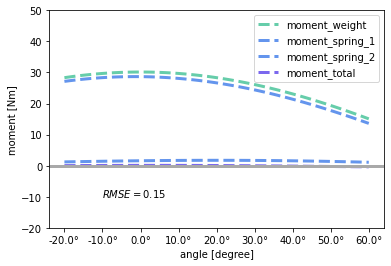

0.14881163953788668


In [11]:
lower_limit, upper_limit, step_size, total_angle_num = dplm_instance.get_allowed_angle_range().values()

a,b,c, rmse = dplm_instance.calculate_current_moment()
%matplotlib inline
plt.cla()    
plt.plot(range(lower_limit, upper_limit+1), a, label = 'moment_weight', ls = '--', lw = 3, color = 'mediumaquamarine')

ax = plt.gca()

for i in range(len(b)):
    plt.plot(range(lower_limit,upper_limit+1), b[i], label = 'moment_spring_{}'.format(i+1), ls = '--', lw = 3, color = 'cornflowerblue')

plt.plot(range(lower_limit, upper_limit+1), c, label = 'moment_total', ls = '--', lw = 3, color = 'mediumslateblue')
plt.axhline(y = 0, ls = '-', lw = 3, color = 'darkgrey')

plt.axis(ymin=-20, ymax=50)
plt.legend()
plt.xlabel('angle [degree]')
plt.ylabel('moment [Nm]')
ax.xaxis.set_major_formatter('{x}°')


plt.text(-10,-10, r'$RMSE={:.2f}$'.format(rmse))


plt.show()

print(rmse)